## Extract parallel corpora automatically with Lingtrain Aligner library

tg: @lingtrain_chat

In [ ]:
!pip install seaborn more_itertools lingtrain-aligner==0.9.4 dateparser sentence_transformers sentencepiece transformers razdel datasets

In [ ]:
# !mkdir mari

#copy example files from
#https://github.com/averkij/a-studio/tree/main/tools/labse_finetune_and_extract/mari

In [ ]:
import seaborn as sns
import logging
from warnings import simplefilter
import sys
import os

from sentence_transformers import SentenceTransformer
from lingtrain_aligner import preprocessor, splitter, aligner, resolver, reader, helper, vis_helper, metrics

sns.set()

In [ ]:
#configure logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
simplefilter(action="ignore", category=FutureWarning)
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] - %(process)d: %(message)s",
    datefmt="%d-%b-%y %H:%M:%S",
    handlers=[
        logging.StreamHandler(sys.stdout),
        logging.FileHandler("_aligner.log", mode="a"),
    ],
)
logging.getLogger("matplotlib.font_manager").disabled = True
logger = logging.getLogger(__name__)
logger.setLevel(logging.WARNING)  # Disable info logging

### Load model

In [ ]:
model = SentenceTransformer('lingtrain/labse-mari')

07-Feb-24 11:28:59 [INFO] - 343: Load pretrained SentenceTransformer: lingtrain/labse-mari


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.52k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/13.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

07-Feb-24 11:29:25 [INFO] - 343: Use pytorch device_name: cuda


### Prepare texts

In [ ]:
text1_input = "mari/artamonov_mhr_full.txt"
text2_input = "mari/artamonov_ru_full.txt"

with open(text1_input, "r", encoding="utf8") as input1:
    text1 = input1.readlines()

with open(text2_input, "r", encoding="utf8") as input2:
    text2 = input2.readlines()

### Mark paragraphs

In [ ]:
config_1 = {
    "type_1": preprocessor.PASS,
    "type_2": preprocessor.PASS,
    "roman": preprocessor.PASS,
    "arabic": preprocessor.PASS,
    "date": preprocessor.PASS,
    "misc": preprocessor.DIVIDER,
}
config_2 = {
    "type_1": preprocessor.PASS,
    "type_2": preprocessor.PASS,
    "roman": preprocessor.PASS,
    "arabic": preprocessor.PASS,
    "date": preprocessor.PASS,
    "misc": preprocessor.DIVIDER,
}

print("\n---------text1\n")
lines1_prepared = preprocessor.mark_headings(text1, config_1)
print("\n---------text2\n")
lines2_prepared = preprocessor.mark_headings(text2, config_2)

lines1_prepared = preprocessor.mark_paragraphs(lines1_prepared)
lines2_prepared = preprocessor.mark_paragraphs(lines2_prepared)


---------text1


---------text2

[type 1]: ЧАСТЬ ПЕРВАЯ%%%%%h1.


In [ ]:
lines1_prepared[:10]

['ЯТМАН ВАТЕ-ВЛАК%%%%%title%%%%%.',
 'Икымше ужаш%%%%%h1%%%%%.',
 '1%%%%%h2%%%%%.',
 'Таче ояр игече лийшаш. Йырваш шып. Шопке лышташат ок тарване. Кечат чӱчкен, модын-воштыл лектеш, чевер капшым ончыктен, Ятман ялым нарашта ӱдырла сӱсанен ончалеш. «Кынел, айдеме, коҥгаш олто, марий чесым ямдыле», — ойлынеже пуйто. Кечыжат таче ала-молан путырак чот модеш, чодыра вуйым лӱҥгыкта, кавам вӱр семын йошкарта, шкежат утыр йӱла, кечывалымсе гай когарта. Шудат ночко, лупс дене йылгыжеш, йӱр толшаш огыл. Молан вара тыгае шокшо, шӱлаш каньысыр? Тошто марий ойлен: «Кече эрденак ырыкта гын, порым ит вучо. Кас марте але тӱтан мардеж пӧрт вуйдам сӱмырен кая, але шолем лиеш, киндым кырен кода». Тошто марийын мутшо чын гынат, ӱшаныме ок шу. Кӧн сай кумылым локтылмо шуэш? Вет таче марий калыкын эн кугу пайремже. Тудлан Марий Эл шукертак ямдылалтын. Пеҥгыде пӱрым, шоҥалтше сырам ямдылен. Пайрем годым ӱдырамашлан сомыл шагалрак лекше манын, паша гычат ончылгоч толыныт, лавыран вургемыштым йогын эҥерыште 

### Create alignment database

In [ ]:
lang_from = "mhr"
lang_to = "ru"

db_path = "3_extract_pairs.db"

In [ ]:
splitted_from = splitter.split_by_sentences_wrapper(lines1_prepared, lang_from)
splitted_to = splitter.split_by_sentences_wrapper(lines2_prepared, lang_to)

for i, s in enumerate(splitted_from[0:10]):
    print(i, "-", s)
print("\n")
for i, s in enumerate(splitted_to[0:10]):
    print(i, "-", s)

print("\n---------------------------------\n\n")
print("len from:", len(splitted_from))
print("len to:", len(splitted_to))

0 - ЯТМАН ВАТЕ-ВЛАК%%%%%title%%%%%.
1 - Икымше ужаш%%%%%h1%%%%%.
2 - 1%%%%%h2%%%%%.
3 - Таче ояр игече лийшаш.
4 - Йырваш шып.
5 - Шопке лышташат ок тарване.
6 - Кечат чӱчкен, модын-воштыл лектеш, чевер капшым ончыктен, Ятман ялым нарашта ӱдырла сӱсанен ончалеш.
7 - «Кынел, айдеме, коҥгаш олто, марий чесым ямдыле», — ойлынеже пуйто.
8 - Кечыжат таче ала-молан путырак чот модеш, чодыра вуйым лӱҥгыкта, кавам вӱр семын йошкарта, шкежат утыр йӱла, кечывалымсе гай когарта.
9 - Шудат ночко, лупс дене йылгыжеш, йӱр толшаш огыл.


0 - СОЛДАТКИ%%%%%title%%%%%.
1 - ЧАСТЬ ПЕРВАЯ%%%%%h1%%%%%.
2 - 1%%%%%h2%%%%%.
3 - По всем приметам, хороший сегодня должен выдаться денек.
4 - Кругом тихо, спокойно, на деревьях не шелохнется ни один листик.
5 - Солнышко будто боится нарушить земную благодать, вспугнуть еще сонные, покорно мокнущие в прохладной ночной росе травы, выбирается из-за дальнего леса робко и осторожно.
6 - Но это только в первые минуты, в первые полчаса; потом, когда травы стряхнут росу, ко

In [ ]:
import os

if os.path.isfile(db_path):
    os.unlink(db_path)

aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)

07-Feb-24 11:30:03 [INFO] - 343: Initializing database 3_extract_pairs.db


## Сегменты

Сегменты — части, главы и любые другие соответствующие по смыслу куски текста. Проставьте в тексте метки %%%%%h2. (вместе с точкой) в местах соответствий в обоих текстах. Тогда варианты выравнивания будут искаться только в соответствующем сегменте. Посмотрите пример в файле.

Проще всего это сделать у глав. Но, если вы носитель, то можете расставить дополнительные метки внутри глав, это разобъет текст на большее число сегментов и улучшит качество.

Количество меток в обоих текстах должно быть одинаковым.

In [ ]:
left_segments, right_segments = aligner.calculate_segments(
    db_path, segmentation_marks=[preprocessor.H2]
)

segments_structure = aligner.get_batch_intersected_for_segments_list(
    db_path, left_segments=left_segments, right_segments=right_segments, batch_size=200
)

segments_structure

[[0, 1], [2, 3], [4, 5], [6, 7, 8], [9], [10, 11, 12], [13, 14, 15]]

In [ ]:
use_segments = True

batch_ids = range(0, 20)

aligner.align_db(
    db_path,
    model_name="_",
    batch_size=200,
    window=40,
    batch_ids=batch_ids,
    save_pic=False,
    embed_batch_size=100,
    normalize_embeddings=True,
    show_progress_bar=False,
    shift=0,
    model=model,
    use_segments=use_segments,
    segmentation_marks=[preprocessor.H2],
)

Aligning using segments.
tasks amount: 16
batch: 0 (0)
07-Feb-24 11:30:07 [INFO] - 343: Batch 0. Calculating vectors.
batch: 1 (1)
07-Feb-24 11:30:11 [INFO] - 343: Batch 1. Calculating vectors.
batch: 2 (2)
07-Feb-24 11:30:12 [INFO] - 343: Batch 2. Calculating vectors.
batch: 3 (3)
07-Feb-24 11:30:14 [INFO] - 343: Batch 3. Calculating vectors.
batch: 4 (4)
07-Feb-24 11:30:15 [INFO] - 343: Batch 4. Calculating vectors.
batch: 5 (5)
07-Feb-24 11:30:16 [INFO] - 343: Batch 5. Calculating vectors.
batch: 6 (6)
07-Feb-24 11:30:17 [INFO] - 343: Batch 6. Calculating vectors.
batch: 7 (7)
07-Feb-24 11:30:18 [INFO] - 343: Batch 7. Calculating vectors.
batch: 8 (8)
07-Feb-24 11:30:19 [INFO] - 343: Batch 8. Calculating vectors.
batch: 9 (9)
07-Feb-24 11:30:20 [INFO] - 343: Batch 9. Calculating vectors.
batch: 10 (10)
07-Feb-24 11:30:21 [INFO] - 343: Batch 10. Calculating vectors.
batch: 11 (11)
07-Feb-24 11:30:23 [INFO] - 343: Batch 11. Calculating vectors.
batch: 12 (12)
07-Feb-24 11:30:24 [INFO]

In [ ]:
print("score 1:", metrics.chain_score(db_path))

score 1: 0.21161657189277006


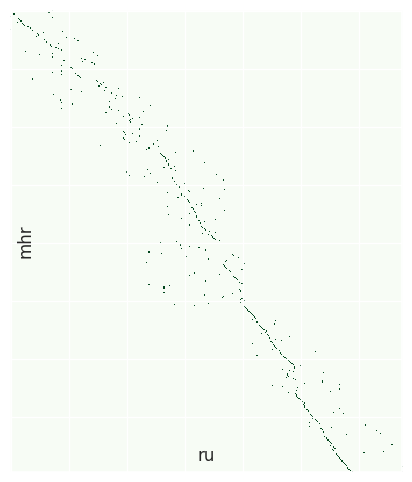

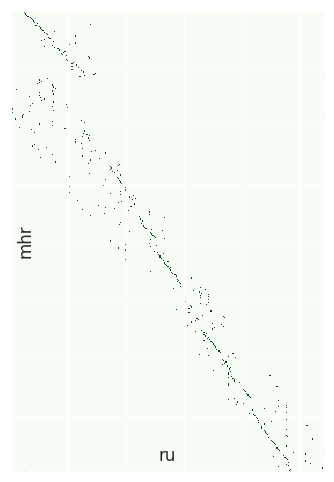

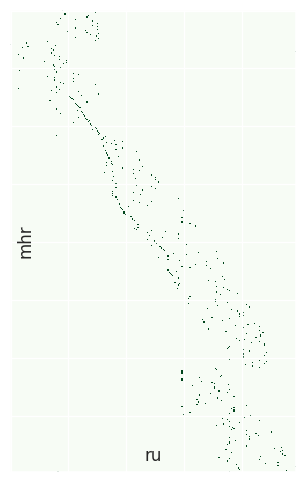

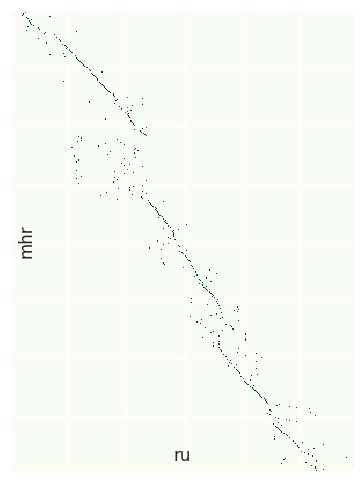

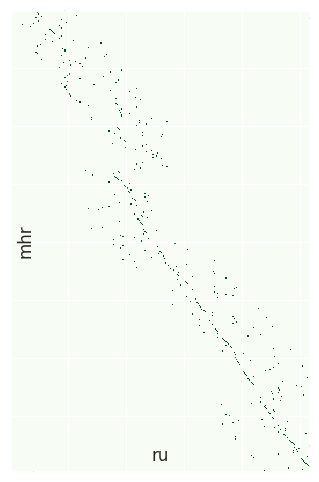

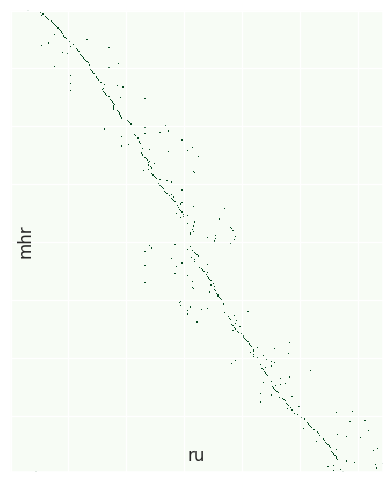

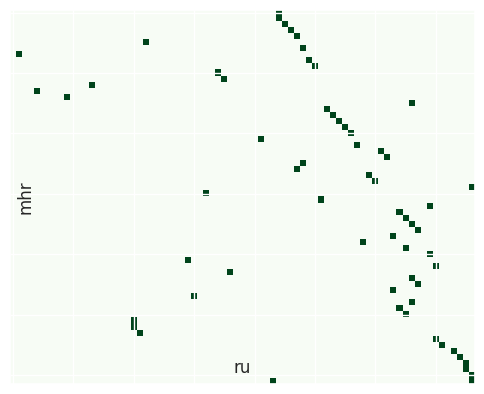

In [ ]:
vis_helper.visualize_alignment_by_db(
    db_path,
    output_path="alignment_vis.png",
    # batch_size=0 if use_segments else 1000,
    batch_size=400,
    size=(600, 600),
    lang_name_from=lang_from,
    lang_name_to=lang_to,
    batch_ids=batch_ids,
    plt_show=True,
)

### Resolve conflicts

In [ ]:
import time
start_time = time.time()

steps = 3
batch_id = -1
for i in range(steps):
    conflicts, rest = resolver.get_all_conflicts(db_path, min_chain_length=2+i, max_conflicts_len=6*(i+1), batch_id=batch_id)
    resolver.get_statistics(conflicts)
    resolver.get_statistics(rest)

    resolver.resolve_all_conflicts(db_path, conflicts, model_name="_", show_logs=False, model=model)

    print("--------------------------------\nresolved. step", i+1)
    print("score 1:", metrics.chain_score(db_path))
    print("score 2:", metrics.chain_score(db_path, mode="both"),"\n------------------------------")

    if len(rest) == 0:
        break

conflicts, rest = resolver.get_all_conflicts(db_path, min_chain_length=2, max_conflicts_len=26, batch_id=batch_id)
resolver.get_statistics(conflicts)
resolver.get_statistics(rest)

resolver.resolve_all_conflicts(db_path, conflicts, model_name="_", show_logs=False, model=model)

print("calculated --- %s seconds ---" % (time.time() - start_time))

conflicts to solve: 130
total conflicts: 259
('3:2', 30)
('2:3', 14)
('3:3', 10)
('2:1', 10)
('4:3', 9)
('5:4', 8)
('4:2', 8)
('6:5', 7)
('5:5', 6)
('6:3', 4)
('6:6', 4)
('5:3', 3)
('5:2', 3)
('3:1', 3)
('4:4', 2)
('3:5', 2)
('5:6', 2)
('6:1', 1)
('3:4', 1)
('4:5', 1)
('6:4', 1)
('4:6', 1)
('7:4', 6)
('7:3', 4)
('12:7', 3)
('10:11', 2)
('18:17', 2)
('9:5', 2)
('16:4', 2)
('14:6', 2)
('17:9', 2)
('7:5', 2)
('10:4', 2)
('11:5', 2)
('8:12', 1)
('3:15', 1)
('26:24', 1)
('9:-5', 1)
('6:0', 1)
('13:32', 1)
('24:11', 1)
('4:9', 1)
('8:-1', 1)
('13:6', 1)
('14:16', 1)
('9:-8', 1)
('9:3', 1)
('15:4', 1)
('10:-4', 1)
('16:7', 1)
('2:-1', 1)
('10:8', 1)
('3:23', 1)
('2:-19', 1)
('22:-13', 1)
('70:50', 1)
('9:6', 1)
('33:16', 1)
('20:9', 1)
('9:29', 1)
('2:-23', 1)
('8:8', 1)
('2:17', 1)
('4:-13', 1)
('7:6', 1)
('10:3', 1)
('47:-8', 1)
('27:14', 1)
('18:7', 1)
('9:4', 1)
('38:8', 1)
('28:30', 1)
('20:5', 1)
('81:38', 1)
('51:15', 1)
('35:5', 1)
('11:14', 1)
('4:7', 1)
('10:18', 1)
('17:12', 1)
('2

100%|██████████| 130/130 [00:07<00:00, 17.99it/s]


--------------------------------
resolved. step 1
score 1: 0.32840236686390534
score 2: 0.6708782104391052 
------------------------------
conflicts to solve: 26
total conflicts: 75
('7:4', 2)
('12:7', 2)
('11:5', 2)
('12:8', 1)
('10:8', 1)
('5:4', 1)
('6:4', 1)
('7:6', 1)
('10:3', 1)
('10:10', 1)
('10:5', 1)
('7:5', 1)
('10:4', 1)
('9:5', 1)
('4:3', 1)
('7:7', 1)
('7:3', 1)
('8:5', 1)
('12:4', 1)
('9:4', 1)
('10:11', 1)
('11:6', 1)
('8:3', 1)
('16:4', 2)
('20:10', 2)
('36:40', 1)
('3:15', 1)
('26:24', 1)
('28:27', 1)
('24:11', 1)
('13:6', 1)
('23:8', 1)
('24:7', 1)
('26:3', 1)
('16:9', 1)
('2:-1', 1)
('101:43', 1)
('33:16', 1)
('45:21', 1)
('32:20', 1)
('74:6', 1)
('65:19', 1)
('28:30', 1)
('20:5', 1)
('178:72', 1)
('14:25', 1)
('17:12', 1)
('59:4', 1)
('2:0', 1)
('20:11', 1)
('23:13', 1)
('65:21', 1)
('21:8', 1)
('18:17', 1)
('14:11', 1)
('52:13', 1)
('29:41', 1)
('30:-9', 1)
('24:8', 1)
('44:31', 1)
('17:9', 1)
('16:10', 1)
('15:10', 1)
('13:7', 1)
('26:10', 1)
('13:5', 1)
('36:12',

100%|██████████| 26/26 [00:08<00:00,  3.07it/s]


--------------------------------
resolved. step 2
score 1: 0.3891820580474934
score 2: 0.706714527027027 
------------------------------
conflicts to solve: 14
total conflicts: 47
('16:4', 2)
('3:15', 1)
('13:6', 1)
('16:9', 1)
('17:12', 1)
('18:17', 1)
('14:11', 1)
('17:9', 1)
('16:10', 1)
('15:10', 1)
('13:7', 1)
('13:5', 1)
('17:8', 1)
('20:10', 2)
('36:40', 1)
('60:52', 1)
('24:11', 1)
('23:8', 1)
('24:7', 1)
('26:3', 1)
('2:-1', 1)
('101:43', 1)
('33:16', 1)
('45:21', 1)
('32:20', 1)
('74:6', 1)
('65:19', 1)
('28:30', 1)
('20:5', 1)
('178:72', 1)
('14:25', 1)
('59:4', 1)
('2:0', 1)
('20:11', 1)
('23:13', 1)
('65:21', 1)
('21:8', 1)
('82:55', 1)
('30:-9', 1)
('24:8', 1)
('44:31', 1)
('26:10', 1)
('36:12', 1)
('4:-2', 1)
('19:4', 1)


100%|██████████| 14/14 [00:19<00:00,  1.37s/it]


--------------------------------
resolved. step 3
score 1: 0.4528903049613109
score 2: 0.742004722043357 
------------------------------
conflicts to solve: 42
total conflicts: 80
('7:3', 3)
('14:6', 2)
('7:4', 2)
('8:12', 1)
('10:11', 1)
('18:17', 1)
('26:24', 1)
('24:11', 1)
('14:16', 1)
('9:3', 1)
('15:4', 1)
('16:7', 1)
('9:6', 1)
('20:9', 1)
('17:9', 1)
('8:8', 1)
('18:7', 1)
('9:4', 1)
('20:5', 1)
('11:14', 1)
('4:7', 1)
('10:18', 1)
('25:13', 1)
('5:7', 1)
('8:6', 1)
('12:5', 1)
('2:24', 1)
('12:7', 1)
('17:14', 1)
('14:5', 1)
('21:1', 1)
('7:5', 1)
('17:13', 1)
('20:15', 1)
('4:22', 1)
('10:4', 1)
('9:2', 1)
('20:10', 1)
('9:-5', 1)
('6:0', 1)
('13:32', 1)
('9:-8', 1)
('10:-4', 1)
('2:-1', 1)
('22:-13', 1)
('70:50', 1)
('33:16', 1)
('9:29', 1)
('2:-23', 1)
('47:-8', 1)
('27:14', 1)
('38:8', 1)
('28:30', 1)
('81:38', 1)
('51:15', 1)
('35:5', 1)
('29:-16', 1)
('2:0', 1)
('2:-22', 1)
('27:16', 1)
('21:-9', 1)
('17:-15', 1)
('35:28', 1)
('8:40', 1)
('5:0', 1)
('21:-6', 1)
('4:-3', 

100%|██████████| 42/42 [05:17<00:00,  7.57s/it]

calculated --- 353.3189699649811 seconds ---


### Resolve conflicts (strategy 2)

In [ ]:
min_chain_length = 2
max_conflicts_len = 26

while True:
    conflicts, rest_conflicts = resolver.get_all_conflicts(
                    db_path,
                    min_chain_length=min_chain_length,
                    max_conflicts_len=max_conflicts_len,
                    batch_id=batch_id,
                    handle_start=True,
                    handle_finish=True,
                )
    fixed_conflicts = resolver.correct_conflicts(
                    db_path,
                    rest_conflicts,
                    batch_id=batch_id,
                    min_chain_length=min_chain_length,
                    max_conflicts_len=max_conflicts_len,
                    handle_start=True,
                    handle_finish=True,
                )
    if not fixed_conflicts:
        break

    resolver.resolve_all_conflicts(
                    db_path,
                    conflicts,
                    model_name="_",
                    show_logs=False,
                    model=model
                )


conflicts to solve: 1
total conflicts: 40
07-Feb-24 11:39:24 [INFO] - 343: Trying to decrease a number of unused conflicts. Fixing negative lenghts.
07-Feb-24 11:39:24 [INFO] - 343: Found 19 conflicts with negative length.
conflicts to solve: 1
total conflicts: 40
conf_start_to, candidate [106] [107]
conflicts to solve: 1
total conflicts: 40
conf_start_to, candidate [100] [101]
conflicts to solve: 1
total conflicts: 39
conf_start_to, candidate [195] [196]
conflicts to solve: 1
total conflicts: 39
conf_start_to, candidate [246] [247]
conflicts to solve: 1
total conflicts: 39
conf_start_to, candidate [241] [242]
conflicts to solve: 2
total conflicts: 40
conf_start_to, candidate [282] [283]
conflicts to solve: 1
total conflicts: 39
conf_start_to, candidate [280] [281]
conflicts to solve: 1
total conflicts: 39
conf_start_to, candidate [337] [338]
conflicts to solve: 1
total conflicts: 39
conf_start_to, candidate [323] [324]
conflicts to solve: 1
total conflicts: 39
conf_start_to, candidate

100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

conflicts to solve: 1
total conflicts: 29
07-Feb-24 11:39:25 [INFO] - 343: Trying to decrease a number of unused conflicts. Fixing negative lenghts.
07-Feb-24 11:39:25 [INFO] - 343: Found 12 conflicts with negative length.


conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [106] [107]
conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [100] [101]
conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [194] [195]
conflicts to solve: 2
total conflicts: 30
conf_start_to, candidate [186] [187]
conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [246] [247]
conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [241] [242]
conflicts to solve: 2
total conflicts: 30
conf_start_to, candidate [282] [283]
conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [280] [281]
conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [337] [338]
conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [323] [324]
conflicts to solve: 1
total conflicts: 29
conf_start_to, candidate [798] [799]
conflicts to solve: 2
total conflicts: 30
conf_start_to, candidate [782] [783]
conflicts to solve: 1
total conflicts: 29
conf_start

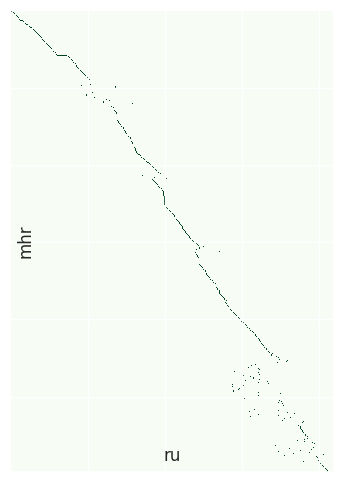

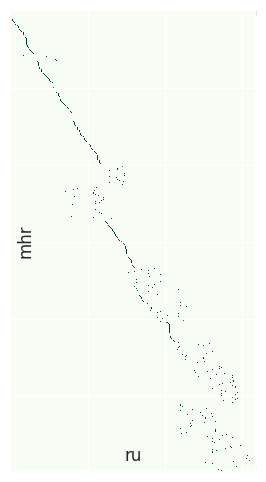

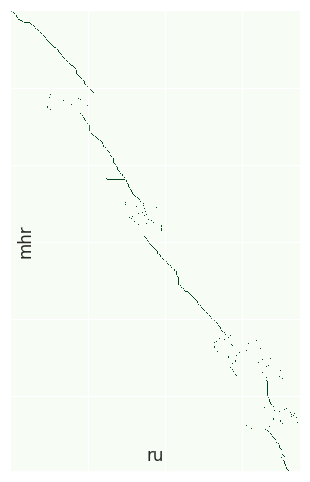

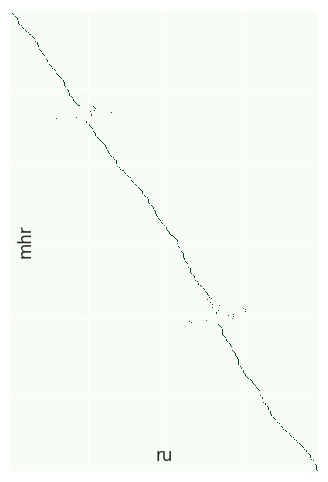

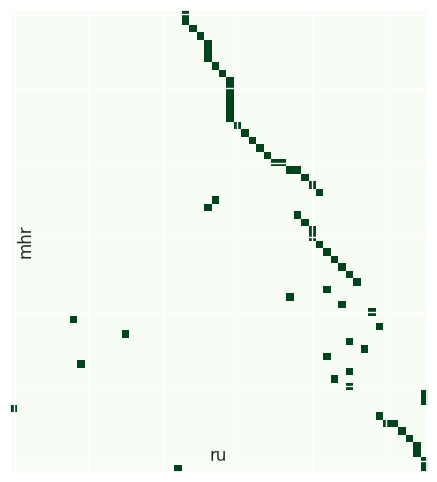

In [ ]:
vis_helper.visualize_alignment_by_db(db_path,
            output_path="alignment_vis.png",
            batch_size=600,
            size=(600,600),
            lang_name_from=lang_from,
            lang_name_to=lang_to,
            # batch_ids=batch_ids,
            plt_show=True)

In [ ]:
print("score 1:", metrics.chain_score(db_path))

score 1: 0.6490196078431373


### Extract pairs

In [ ]:
pairs = reader.get_aligned_pair_chains(db_path, min_len=3)

In [ ]:
len(pairs)

1241

Omit pairs with very large length ratio difference.

In [ ]:
res = []

for p in pairs:
    if len(p[0])/len(p[1]) > 1.8 or len(p[0])/len(p[1]) < 0.6:
        continue
    res.append(p)

len(res), res

(874,
 [['Шудат ночко, лупс дене йылгыжеш, йӱр толшаш огыл.',
   'Еще так рано, а печет, как в полдень.'],
  ['Тошто марий ойлен: «Кече эрденак ырыкта гын, порым ит вучо.',
   'Старый мариец говаривал: «Если солнце палит с утра — не жди добра».'],
  ['Кас марте але тӱтан мардеж пӧрт вуйдам сӱмырен кая, але шолем лиеш, киндым кырен кода».',
   'За этим к вечеру следовало ожидать ураганного ветра, который сорвет крыши с домов, или, еще того хуже, сыпанет град и побьет весь хлеб.'],
  ['Кӧн сай кумылым локтылмо шуэш? Вет таче марий калыкын эн кугу пайремже.',
   'Ведь сегодня у народа мари самый большой праздник.'],
  ['Тудлан Марий Эл шукертак ямдылалтын.',
   'И люди заранее готовились к нему.'],
  ['Пеҥгыде пӱрым, шоҥалтше сырам ямдылен.',
   'Наварили крепкой браги и пенистого пива.'],
  ['Пайрем годым ӱдырамашлан сомыл шагалрак лекше манын, паша гычат ончылгоч толыныт, лавыран вургемыштым йогын эҥерыште шӱалтеныт, кӱварым, окнам, пӧртӧнчылым мушкын шынденыт — кавасе кечыла веле йылгы

### Save results

In [ ]:
import json

json.dump(res, open('./mari_extracted_artamonov_part1.json', 'w'), ensure_ascii=False, indent=4)